In [1]:
import correlation_steps as corr

directory = "/data/20170717/bead15_15um_QWP/steps/"
calibration_path = directory + "calibration_charge/"
measurement_path = directory + "measurement_2/"

corr, dc, t = corr.formData(measurement_path, calibration_path)

finding phase shift
phase shift is  106
calibrating constant c =  3.37426655786e+15


TypeError: can't multiply sequence by non-int of type 'builtin_function_or_method'

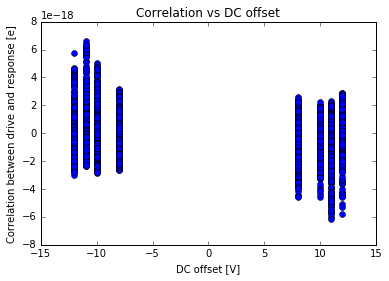

In [12]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(dc, corr, 'o')
plt.xlabel('DC offset [V]')
plt.ylabel('Correlation between drive and response [e]')
plt.title('Correlation vs DC offset')
plt.show()

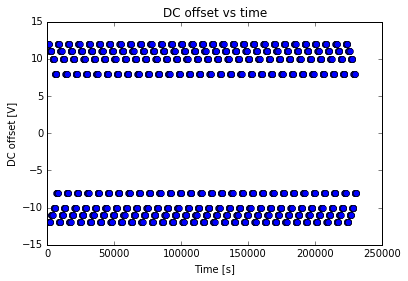

In [15]:
plt.figure()
plt.plot(t, dc, 'o')
plt.ylabel('DC offset [V]')
plt.xlabel('Time [s]')
plt.title('DC offset vs time')
plt.show()

In [27]:
i = 0
j = next(i for i, v in enumerate(dc) if v!=dc[0])
j

1

In [28]:
dc[1]

11.0

In [19]:
dc[0]

-12.0

In [31]:
dc

(-12.0,
 11.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 -12.0,
 -12.0,
 -12.0,
 -12.0,
 -12.0,
 -12.0,
 -12.0,
 -12.0,
 -12.0,
 -12.0,
 -12.0,
 -12.0,
 -12.0,
 -12.0,
 -12.0,
 -12.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 -11.0,
 -11.0,
 -11.0,
 -11.0,
 -11.0,
 -11.0,
 -11.0,
 -11.0,
 -11.0,
 -11.0,
 -11.0,
 -11.0,
 -11.0,
 -11.0,
 -11.0,
 -11.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 -10.0,
 -10.0,
 -10.0,
 -10.0,
 -10.0,
 -10.0,
 -10.0,
 -10.0,
 -10.0,
 -10.0,
 -10.0,
 -10.0,
 -10.0,
 -10.0,
 -10.0,
 -10.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 -8.0,
 -8.0,
 -8.0,
 -8.0,
 -8.0,
 -8.0,
 -8.0,
 -8.0,
 -8.0,
 -8.0,
 -8.0,
 -8.0,
 -8.0,
 -8.0,
 -8.0,
 -8.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 

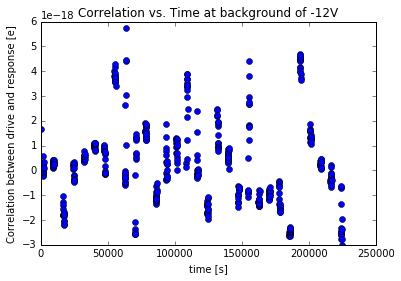

In [21]:
plt.figure()
plt.plot(t[i:j], corr[i:j], 'o')
plt.xlabel('time [s]')
plt.ylabel('Correlation between drive and response [e]')
plt.title('Correlation vs. Time at background of -12V')
plt.show()

In [ ]:
def formAveragedData(corr, dc):
    dcmag = map(abs, dc)
    dcValues = list(set(dcmag))
    corrValues = np.zeros(len(dcValues))
    for c, v in zip(corr, dcmag):
        i = dcValues.index(v)
        corrValues[i] += c
    corrValues = corrValues/float(len(corr))
    return zip(*sorted(zip(dcValues, corrValues)))


def plotAveragedData(corr, dc):
    d, c = formAveragedData(corr, dc)
    plt.figure()
    plt.plot(d, c, 'o')
    plt.xlabel('DC offset [V]')
    plt.ylabel('Averaged Correlation between drive and response [e]')
    plt.title('Averaged Correlation vs DC offset')
    plt.show(block=False)


def plotCorr(corr, dc, t):
    plt.figure()
    plt.plot(dc, corr, 'o')
    plt.xlabel('DC offset [V]')
    plt.ylabel('Correlation between drive and response [e]')
    plt.title('Correlation vs DC offset')
    plt.show(block=False)
    # now plot the correlations over time
    plt.figure()
    dc, t, corr = zip(*sorted(zip(dc, t, corr)))
    i = 0
    while i < len(corr):
        j = max(loc for loc, val in enumerate(dc) if val == dc[i]) + 1
        plt.plot(t[i:j], corr[i:j], 'o')
        i = j
    plt.xlabel('time [s]')
    plt.ylabel('Correlation between drive and response [e]')
    plt.title('Correlation vs. Time')
    plt.show()